In [1]:
import pandas as pd
import sqlite3
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import zipfile
import io
import geopandas
import seaborn as sns

In [2]:
# To study what are the characteristics of red and white wine. Are they same ? WHat is more preferred in what type of wine.

In [3]:
rd = pd.read_csv("winequality-red.csv")

In [4]:
wt = pd.read_csv("winequality-white.csv")

In [5]:
rd.isna().sum() #check how clean data is

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
rd["type"] = "red"
wt["type"] = "white"
a = rd.append(wt)#all

In [7]:
rdtr, rdte = train_test_split(rd, random_state=0)
wttr, wtte = train_test_split(wt, random_state=0) 


Text(0, 0.5, 'Number of Wines')

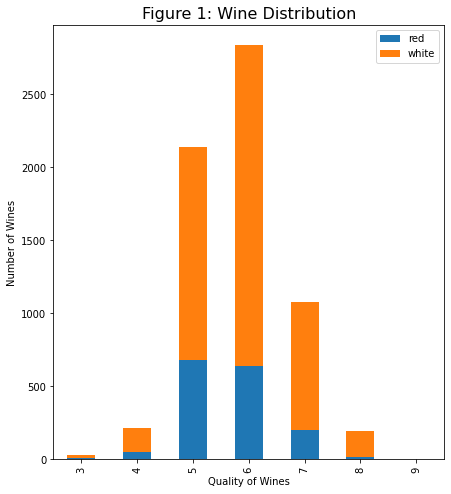

In [8]:
#fig
labels = a["quality"].unique()
labels.sort()
D={}
for i in labels:
    D[i] = {}
    D[i]["red"] =  (a[a["quality"]==i]["type"] =="red").astype(int).sum()
    D[i]["white"] =  (a[a["quality"]==i]["type"] =="white").astype(int).sum()
pl = pd.DataFrame(D)
pl = pl.T

ax = pl.plot.bar(stacked = True,figsize = (7,8))
ax.set_title('Figure 1: Wine Distribution', size = 16)
ax.set_xlabel("Quality of Wines")
ax.set_ylabel("Number of Wines")
#ax

In [9]:
rd["approved"] = (rd["quality"]>6).astype(int)
wt["approved"] = (wt["quality"]>6).astype(int)
a["approved"] = (wt["quality"]>6).astype(int)

In [10]:
#PCA

def pcaFunc(x, df):
    pca = PCA(n_components = x)
    features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
    X = df.iloc[:,:-3]
    X = StandardScaler().fit_transform(X)
    pd.DataFrame(data = X, columns = features)
    Princi = pca.fit_transform(X)
    return pca.explained_variance_ratio_

Text(0, 0.5, 'Explained Variance')

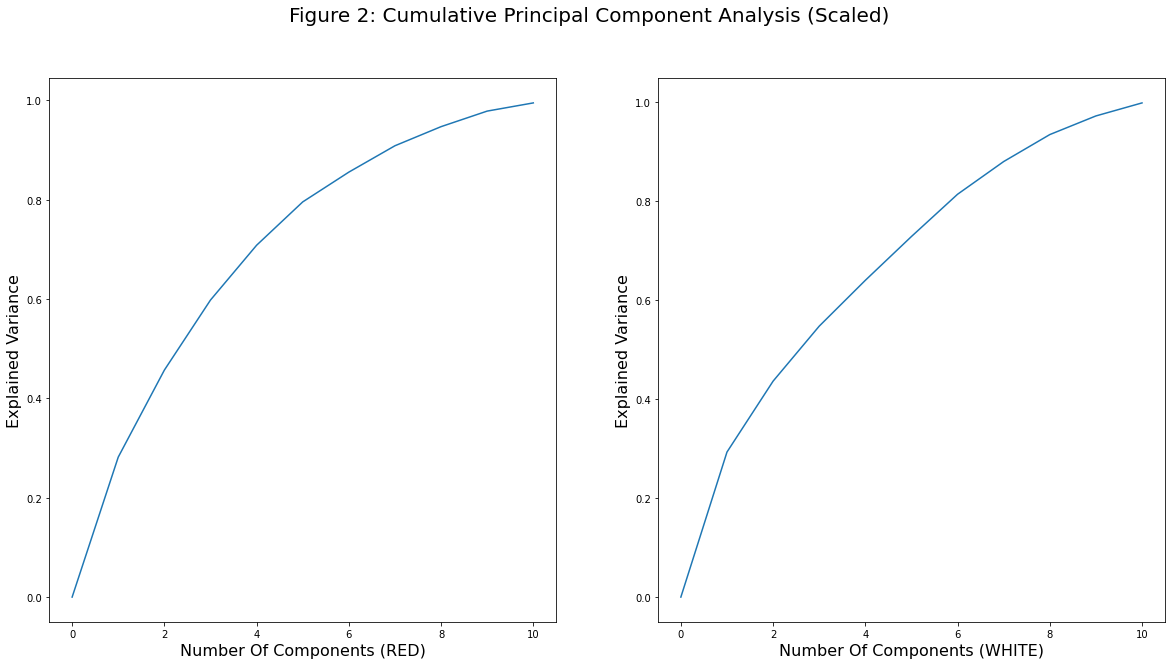

In [11]:
fig2r = []
for i in range(11):
    fig2r.append(pcaFunc(i,rd).sum())
fig2w = []
for i in range(11):
    fig2w.append(pcaFunc(i,wt).sum())
    
    
figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
axes[0].plot(fig2r)
axes[1].plot(fig2w)
figure.suptitle("Figure 2: Cumulative Principal Component Analysis (Scaled)", size = 20)
#figure.xlabel("Number Of Components")
#figure.ylabel("Explained Variance")
axes[0].set_xlabel("Number Of Components (RED)", size = 16)
axes[1].set_xlabel("Number Of Components (WHITE)", size = 16)
axes[0].set_ylabel("Explained Variance", size = 16)
axes[1].set_ylabel("Explained Variance", size = 16)

In [12]:
lr = LinearRegression()
lr.fit(rdtr[["fixed acidity","citric acid","chlorides","total sulfur dioxide","pH","alcohol"]], rdtr["quality"]) 
lr.score(rdte[["fixed acidity","citric acid","chlorides","total sulfur dioxide","pH","alcohol"]], rdte["quality"]) 

0.2818894278009938

In [13]:
m2 = Pipeline([
        ("poly", PolynomialFeatures(degree=2)),
        ("lr", LinearRegression())
         ])

In [14]:
m2.fit(rdtr[["fixed acidity","citric acid","chlorides","total sulfur dioxide","pH","alcohol"]], rdtr["quality"]) 
m2.score(rdte[["fixed acidity","citric acid","chlorides","total sulfur dioxide","pH","alcohol"]], rdte["quality"]) 

0.23778335985016363

In [15]:
m3 = Pipeline([
        ("std",StandardScaler()),
        ("logr", LogisticRegression(max_iter = 300))
        ])

In [16]:
rdnr, rdne = train_test_split(rd, random_state=0)
wtnr, wtne = train_test_split(wt, random_state=0)

In [17]:
#all the columns red
xcols = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
m3.fit(rdnr[xcols], rdnr["approved"]) 
m3.score(rdne[xcols], rdne["approved"]) 

0.895

In [18]:
#all columns white
m3.fit(wtnr[xcols], wtnr["approved"]) 
m3.score(wtne[xcols], wtne["approved"]) 

0.8

In [19]:
rd.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,approved
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153791,-0.113198,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010487,0.076479,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060885,0.035506,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187310,0.203048,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005627,0.047402,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153791,-0.010487,-0.060885,0.187310,0.005627,1.000000,0.668025,-0.021981,0.070288,0.051606,-0.069346,-0.050554,-0.071594
total sulfur dioxide,-0.113198,0.076479,0.035506,0.203048,0.047402,0.668025,1.000000,0.071256,-0.066507,0.042923,-0.205667,-0.185112,-0.139522
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021981,0.071256,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070288,-0.066507,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051606,0.042923,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


In [20]:
#top col red
newcolr = ["volatile acidity","total sulfur dioxide","density","alcohol", "sulphates", "citric acid"]
m3.fit(rdnr[newcolr], rdnr["approved"]) 
m3.score(rdne[newcolr], rdne["approved"]) 
coefRed = m3["logr"].coef_
coefRed

array([[-8.36437146e-01, -3.41903187e-01, -3.12536455e-04,
         1.01787785e+00,  4.43827322e-01,  6.35593571e-02]])

In [21]:
newcolw= ["volatile acidity","total sulfur dioxide","density","alcohol", "sulphates", "pH","chlorides","fixed acidity"]
m3.fit(wtnr[newcolw], wtnr["approved"]) 
m3.score(wtne[newcolw], wtne["approved"]) 
coefWhite = m3["logr"].coef_

In [22]:
coefWhite

array([[-0.43251628,  0.06352931,  0.29794864,  1.22379878,  0.10941238,
         0.10246869, -0.40261119, -0.07724579]])

Text(0.5, 1.0, 'Figure 3: Coefficients for Major Factors in Wine')

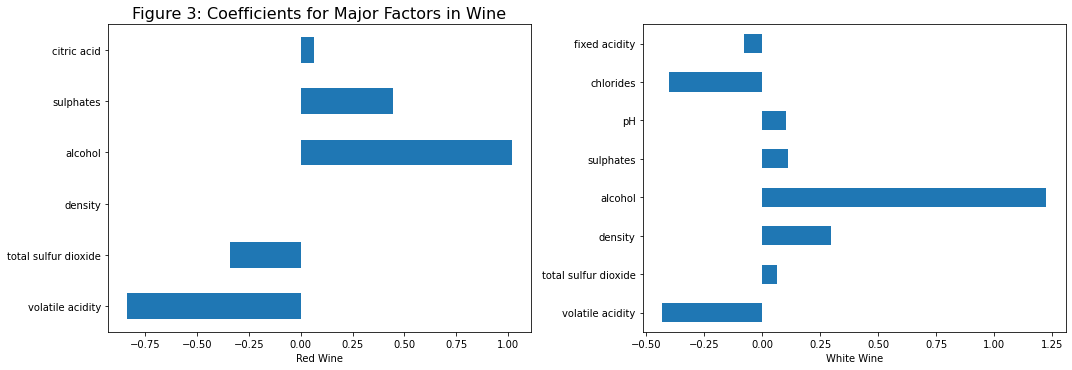

In [23]:
f, axs = plt.subplots(2,2,figsize=(15,5))
mainpl = plt.subplot(1, 2, 1)
plt.xlabel("Red Wine")
ax = pd.Series(coefRed[0], index = newcolr).plot.barh()
plt.subplot(1,2,2)
plt.xlabel("White Wine")
ax2 =  pd.Series(coefWhite[0], index = newcolw).plot.barh()
plt.tight_layout()
mainpl.set_title("Figure 3: Coefficients for Major Factors in Wine", size = 16 )

In [24]:
import seaborn as sns

<AxesSubplot:>

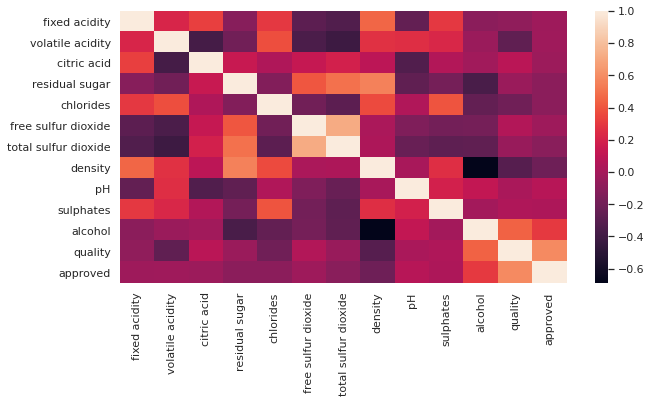

In [25]:
#fig, ax = pyplot.subplots(figsize=(8,8)
#seaborn.violinplot(ax=ax, data=df, **violin_options)
sns.set(rc={'figure.figsize':(10,5)})                       
sns.heatmap(a.corr())